In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report, accuracy_score,  confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8    #Set the default size of plots to 14x8 inches for better readability
RANDOM_SEED = 42                      #Setting a random seed to ensure reproducibility of results
LABELS = ["Normal", "Fraud"]

In [2]:
# Loading the data
file_path = "Dataset/credit_card_data.csv"
data = pd.read_csv(file_path)

In [3]:
# Data preparation
# Split the data into features (X) and target variable (Y)
X = data.drop(columns=['Class', 'Time'])  # Features
Y = data['Class']  # Target variable

In [4]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Basic Linear Regression Model

In [5]:
# Initialize the logistic regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

In [6]:
# Train the model
log_reg_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [7]:
# Predictions on the testing set. 
# Predict class labels using the default threshold of 0.5
Y_pred = log_reg_model.predict(X_test)

# Predict probabilities 
# probability of having positive 'Class' (1) - fraud - for each instance in 'X_test'
# This helps to adjust the Classification Threshold, calculate metrics like ROC AUC, knowing the confidence of a prediction...
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]

Accuracy Score: 0.9991222218320986
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56855     9]
 [   41    57]]
ROC AUC Score: 0.9761437601208183


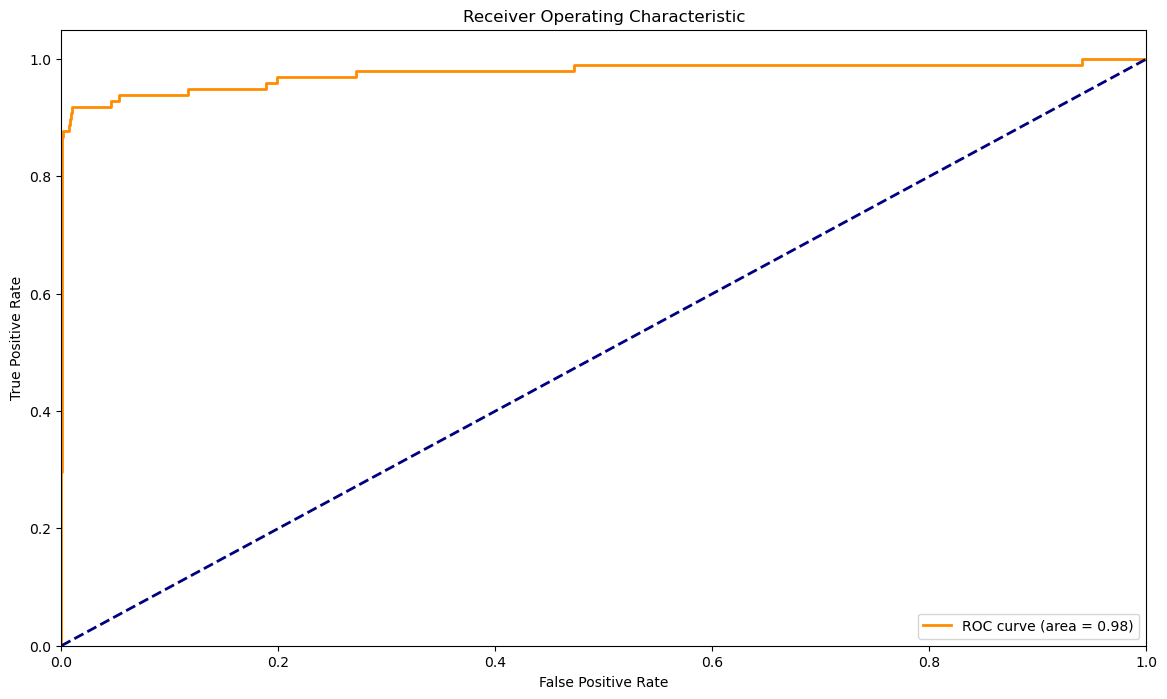

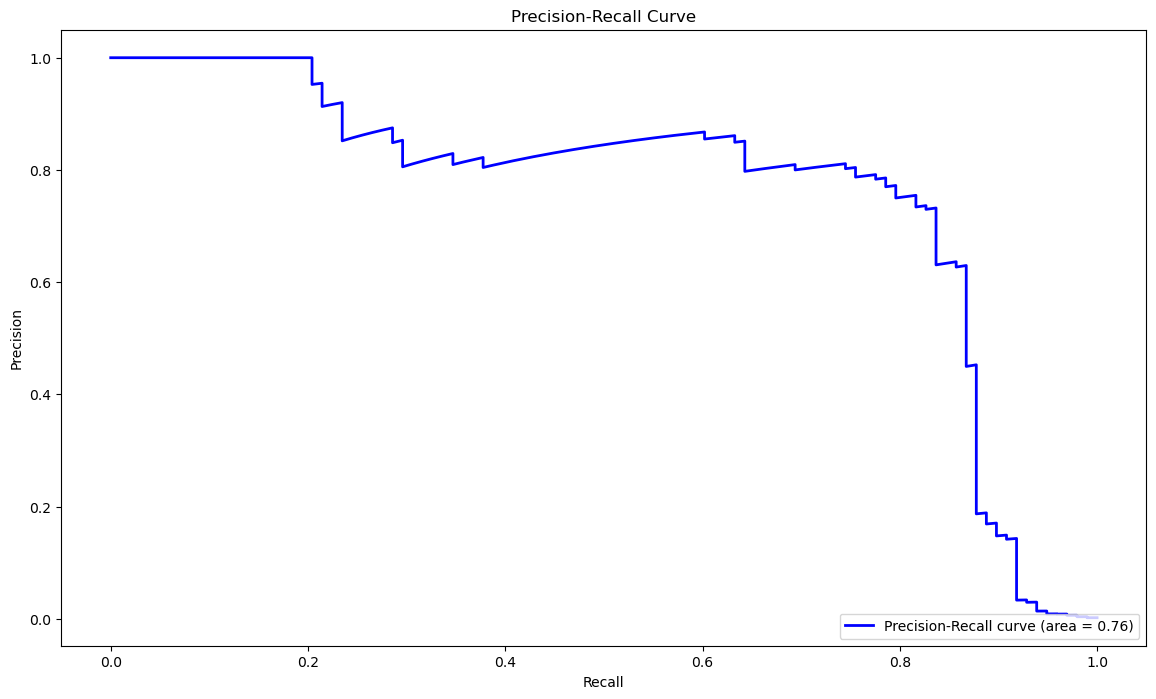

In [8]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy Score:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Calculate and plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate and plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, y_pred_prob)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

## HANDLING IMBALANCED DATA

Developing fraud detection algorithms comes with some particular challenges. The most important one being the imbalance of data: Class 1 observations (fraud) are a very small minority of the total amount of transactions, which makes learning from them more difficult for the models.

In this section, we explore various techniques to handle an imbalanced dataset. We will attempt to improve the model's ability to detect more cases of fraud than usual, learning from the same, proportionally small, amount of Class 1 cases that we have.

We have already split our data between training and test sets for both X and Y for our basic model. We will keep using those same sets, but now we will apply changes in how we define the Machine Learning models, and we will evaluate their results to find what works best.

### Applying SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is an form of Synthetic Sampling. 
It generates additional, synthetic instances for the minority class by interpolating between the few already existing instances. SMOTE randomly selects a minority class instance and one of its k-nearest neighbors and creates synthetic examples along the line connecting these instances. The goal here is to increase the number of minority class samples, and therefore to balance class distribution, allowing the model to learn more effectively from the minority class (fraudulent transactions).

In [9]:
# Apply SMOTE to balance the class distribution in the training data
smote = SMOTE(random_state=RANDOM_SEED)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [10]:
# Initialize the logistic regression model
log_reg_model_SMOTE = LogisticRegression(random_state=42, max_iter=1500) # We increase number of iterations

In [11]:
# Train the model
log_reg_model_SMOTE.fit(X_train_smote, Y_train_smote)

LogisticRegression(max_iter=1500, random_state=42)

In [12]:
# Predictions on the testing set. 
# Predict class labels using the default threshold of 0.5
Y_pred_smote = log_reg_model_SMOTE.predict(X_test)

# Predict probabilities 
# probability of having positive 'Class' (1) - fraud - for each instance in 'X_test'
y_pred_prob_smote = log_reg_model_SMOTE.predict_proba(X_test)[:, 1]

Accuracy Score: 0.9813559917137741
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
[[55811  1053]
 [    9    89]]
ROC AUC Score: 0.9727207163816568


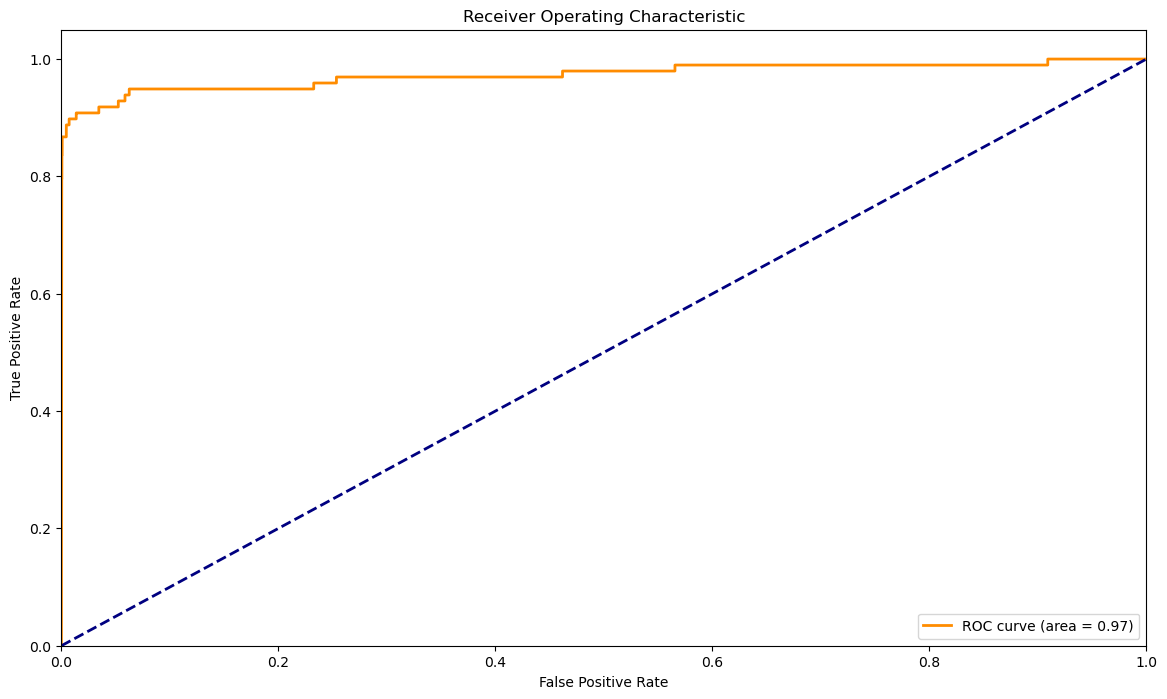

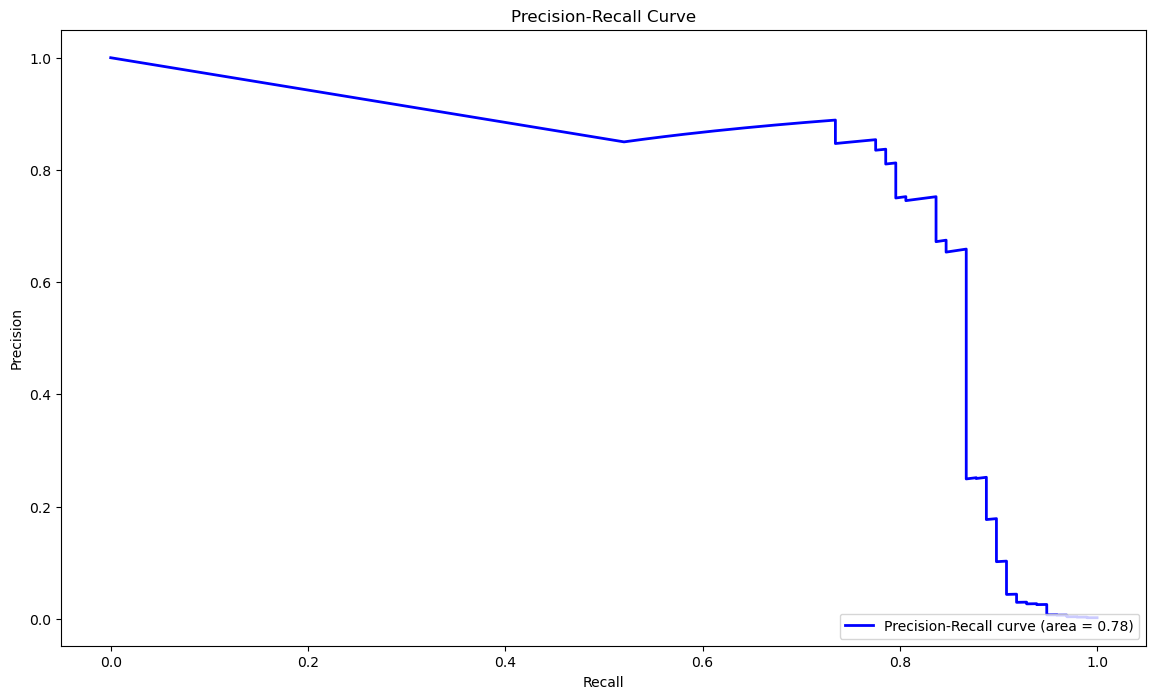

In [13]:
# Evaluate the model resampled with SMOTE
accuracy = accuracy_score(Y_test, Y_pred_smote)
print("Accuracy Score:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, Y_pred_smote))
print("Confusion Matrix:")
# Confusion Matrix
print(confusion_matrix(Y_test, Y_pred_smote))

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, y_pred_prob_smote)
print("ROC AUC Score:", roc_auc)

# Calculate and plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_prob_smote)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate and plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, y_pred_prob_smote)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

When evaluating the model we see some interesting results. Recall has improved drastically by applying the SMOTE technique to handle imabalanced data. 
We now detect a larger amount of fraudulent transactions (89 instead of the 57 from our basic model). However precision has tanked to 0.08 from an already decent 0.86. While we detect more cases of fraud, we are having too many false positives. We will now try a different synthetic sampling technique, a variation of SMOTE named ADASYN.

### Applying ADASYN (Adaptive Synthetic Sampling)

ADASYN is another example of synthetic samples. 
It is similar to SMOTE in how it works, but it applies higher weights to those specific minority class instances that are harder to learn. It adaptively selects samples to generate based on the density distribution of the minority class.

In [14]:
# Apply ADASYN to balance the training data
adasyn = ADASYN(random_state=RANDOM_SEED)
X_train_adasyn, Y_train_adasyn = adasyn.fit_resample(X_train, Y_train)

In [15]:
# Initialize the logistic regression model
log_reg_model_ADASYN = LogisticRegression(random_state=42, max_iter=1500) # We increase number of iterations

In [16]:
# Train the model
log_reg_model_ADASYN.fit(X_train_adasyn, Y_train_adasyn)

LogisticRegression(max_iter=1500, random_state=42)

In [17]:
# Predictions on the testing set. 
# Predict class labels using the default threshold of 0.5
Y_pred_adasyn = log_reg_model_ADASYN.predict(X_test)

# Predict probabilities 
# probability of having positive 'Class' (1) - fraud - for each instance in 'X_test'
y_pred_prob_adasyn = log_reg_model_ADASYN.predict_proba(X_test)[:, 1]

Accuracy Score: 0.948263754783891
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.92      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962

Confusion Matrix:
[[53925  2939]
 [    8    90]]
ROC AUC Score: 0.970940870017112


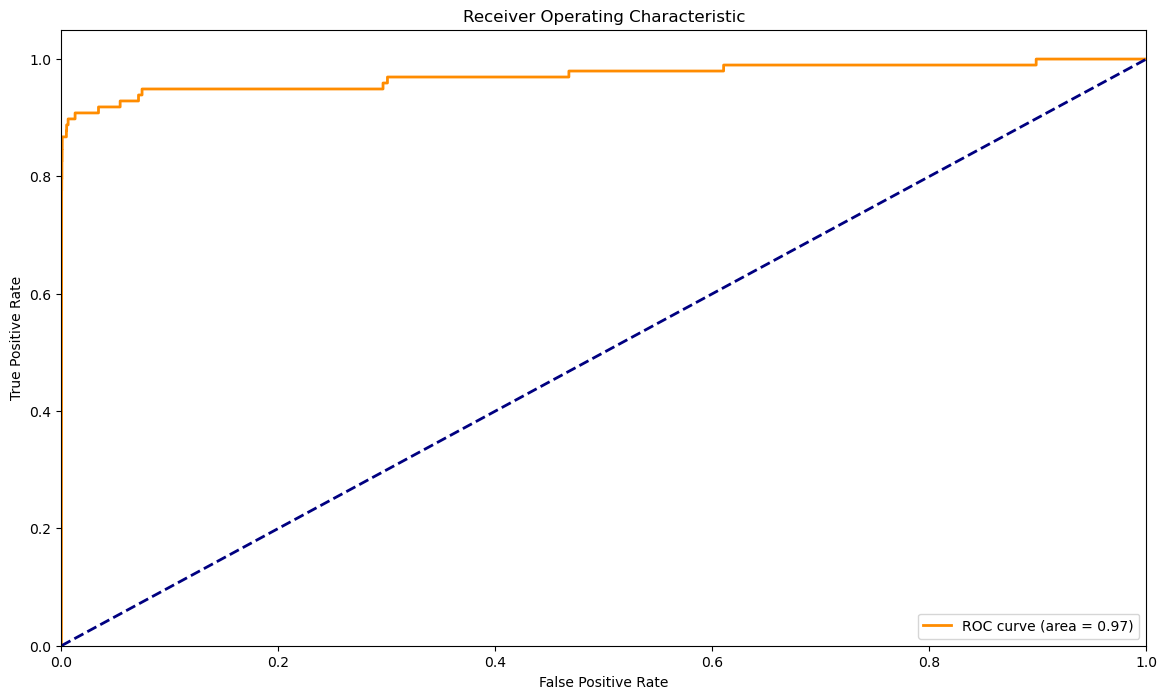

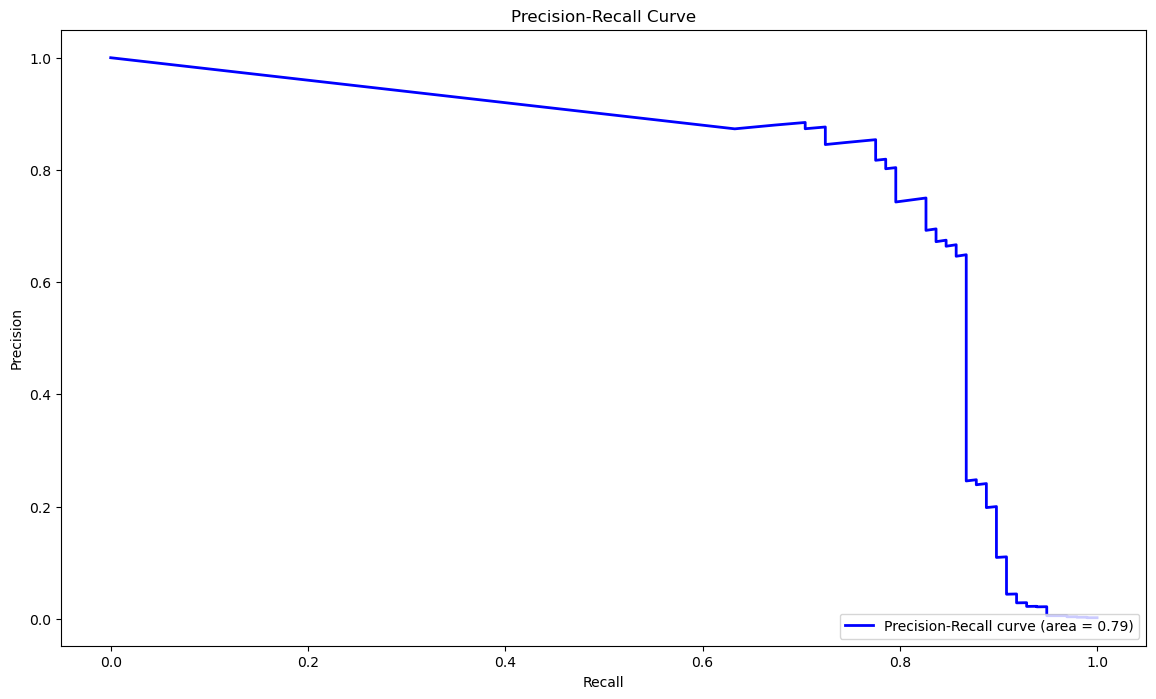

In [18]:
# Evaluate the model resampled with ADASYN
accuracy = accuracy_score(Y_test, Y_pred_adasyn)
print("Accuracy Score:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, Y_pred_adasyn))
print("Confusion Matrix:")
# Confusion Matrix
print(confusion_matrix(Y_test, Y_pred_adasyn))

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, y_pred_prob_adasyn)
print("ROC AUC Score:", roc_auc)

# Calculate and plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_prob_adasyn)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate and plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, y_pred_prob_adasyn)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

The ADASYN model improves Class 1 recall a bit (to 0.92), but it decreases precision even more than SMOTE's low value (from 0.06 to 0.03). 

To continue we will see if we can get better results from a different methodology to treat imbalanced data: Class weights.

### Applying Class Weight Rebalancing

The Class Weighting technique is an alternative to synthetic sampling.
Here, instead of generating new data (as we did with SMOTE and ADASYN), we adjust the class weights of the classes in the loss function during model training. The goal is to penalize misclassifications of the minority class (fraud transactions) more heavily than misclassifications of the majority class.
This allows the model to learn from the imbalanced data more effectively.

In [19]:
# Initialize the Logistic Regression with Class Weighting and Threshold Tuning
log_reg_model_weighted = LogisticRegression(random_state=RANDOM_SEED, max_iter=1500, class_weight='balanced') # Class Weighting applied
# Train the model
log_reg_model_weighted.fit(X_train, Y_train)   # Reusing the original training sets

LogisticRegression(class_weight='balanced', max_iter=1500, random_state=42)

As we will see in the results, 
the default threshold for training the model (0.5) gives us a recall for fraud that is as good as the ADASYN model (0.92) without compromising precision so much (0.06 instead of 0.03). While precision is still extremely low, class weighting seems to be marginally better than synthetic sampling. 

To explore more forms of class weighting we will try tuning different thresholds beyond just 0.5. Threshold tuning is a technique used to adjust the decision boundary of a classification model. (By default most classification models like logistic regression use a probability threshold of 0.5 to decide the class. If the predicted probability is above this threshold, the instance is classified as the positive class; otherwise, it is classified as the negative class. Changing the threshold could help us detect more fraud cases).

In [20]:
# Predict probabilities 
# probability of having positive 'Class' (1) - fraud - for each instance in 'X_test'
y_pred_prob_weighted = log_reg_model_weighted.predict_proba(X_test)[:, 1]

# Predictions on the testing set. 
# Predict class labels. Instead of using the default threshold of 0.5, we will now try various thresholds to pick the best one.
# lower thresholds often help improve recall at the expense of precision. However, to be thorough we evaluate a wide range of thresholds
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
for threshold in thresholds:
    # Apply threshold
    y_pred_threshold_weighted = (y_pred_prob_weighted >= threshold).astype(int)    # y_pred
    
    # Evaluate performance of each variation of the model
    accuracy_threshold = accuracy_score(Y_test, y_pred_threshold_weighted)
    print(f"Logistic Regression with Class Weighting - Threshold {threshold}")
    print(f"Accuracy Score: {accuracy_threshold}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred_threshold_weighted))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, y_pred_threshold_weighted))
    print("-----")
roc_auc_weighted = roc_auc_score(Y_test, y_pred_prob_weighted)  
print("ROC AUC Score:",roc_auc_weighted) # ROC AUC score doesn't depend on threshold, it evaluates performance across all possible thresholds. No need to recalculate

Logistic Regression with Class Weighting - Threshold 0.1
Accuracy Score: 0.7946701309645027
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.89     56864
           1       0.01      0.98      0.02        98

    accuracy                           0.79     56962
   macro avg       0.50      0.89      0.45     56962
weighted avg       1.00      0.79      0.88     56962

Confusion Matrix:
[[45170 11694]
 [    2    96]]
-----
Logistic Regression with Class Weighting - Threshold 0.3
Accuracy Score: 0.9441206418313963
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.03      0.93      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.94      0.51     56962
weighted avg       1.00      0.94      0.97     56962

Confusion Matrix:
[[53688  3176]
 [    7    91]]
-----
Logist

By balancing the data and using a higher threshold, we can improve precision a bit.
Class Weighting at threshold 0.9 for example detects 85 fraudulent cases while retaining a precision of 0.27.
Still, precision remains unacceptably low for the needs of most financial institutions and the improvements on recall may not be worth it. In the end the model of choice will depend on the preferences of the financial institution, but it would be better to begin recommending the basic model without any method of balancing.

For the next section we'll revise the basic logistic regression by applying threshold tuning, and compare the results until we find the model we can recommend the most.

### Logistic Regression with Threshold Tuning (No balancing)

In [21]:
# We return to our basic model, without any sort of Class Balancing
# This time, we will try different thresholds just like we did during the Class Weighted model

# Predictions on the testing set.
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Apply threshold
    Y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    
    # Evaluate performance
    accuracy_threshold = accuracy_score(Y_test, Y_pred_threshold)
    print(f"Threshold: {threshold}")
    print(f"Accuracy Score: {accuracy_threshold}")
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred_threshold))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, Y_pred_threshold))
    print("-----")
# ROC AUC score doesn't depend on a specific threshold, it measures model performance across all possible thresholds, so no need to recalculate

Threshold: 0.1
Accuracy Score: 0.9992451107756047
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.77      0.78        98

    accuracy                           1.00     56962
   macro avg       0.89      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56844    20]
 [   23    75]]
-----
Threshold: 0.2
Accuracy Score: 0.9991924440855307
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.69      0.75        98

    accuracy                           1.00     56962
   macro avg       0.90      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56848    16]
 [   30    68]]
-----
Threshold: 0.3
Accuracy Score: 0.9991748885221726
Classification Report:
              pre

The evaluation of the model seems to provide much better precision in this case, without performing any balancing.

There exists a tradeoff between precision and recall as we increase the threshold.

Lower thresholds have higher Recall, which indicates that the model is better at identifying fraud cases correctly. This is crucial in scenarios where detecting fraudulent transactions is the priority, at the cost of having more false positives.

Precision however seems to peak at the middle thresholds from 0.4 to 0.6.

We can look at the f1-score, which is the harmonic mean of precision and recall, providing a single metric that balances both to summarize performance in a single number.
Judging by the f1-score, thresholds 0.1 is the preferred one. In an aim to find the best threshold according to the f1-metric, we follow through this logic to test values below the 0.1 threshold. 

In [22]:
# Predictions on the testing set. Lowering the threshold below 0.1:
thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

for threshold in thresholds:
    # Apply threshold
    Y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    
    # Evaluate performance
    accuracy_threshold = accuracy_score(Y_test, Y_pred_threshold)
    print(f"Threshold: {threshold}")
    print(f"Accuracy Score: {accuracy_threshold}")
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred_threshold))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, Y_pred_threshold))
    print("-----")

Threshold: 0.01
Accuracy Score: 0.9978933323970366
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.88      0.59        98

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56756   108]
 [   12    86]]
-----
Threshold: 0.02
Accuracy Score: 0.9988588883817282
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.87      0.72        98

    accuracy                           1.00     56962
   macro avg       0.81      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56812    52]
 [   13    85]]
-----
Threshold: 0.03
Accuracy Score: 0.9989817773252344
Classification Report:
              

Thresholds at 0.07 and 0.08 give us the best, and equivalent, results: A decent 0.79 value for f1-score, recall and precision. 
The ROC AUC Score, ROC Curve and Precision-Recall Curve remain the same as in our first basic model.

If we are not prioritizing fraud detection at whatever cost, and want to avoid too many false positives (interrupting valid transactions for normal clients), we can pick it.

From the testing set of 56962 transactions, this model automatically identifies a majority of 77 out of the 98 fraud transactions. And this will be inconvenient to a small amount of normal clients, responsible for 21 out of the 56864 legal transactions (0.00037% of normal clients).


If our priority is indeed detecting as many fraudulent transactions as possible, no matter the cost, the Class Weighted model at threshold 0.1 would be our choice.
From the testing set of 56962 transactions, that model automatically identifies a majority of 96 out of the 98 fraud transactions. However it will incorrectly bother clients responsible for 11694 out of the 56864 legal transactions (20,56% of normal clients), a price often too high for regular financial institutions.